# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


588

In [3]:
cities_test=cities[0:10]
cities_test

['berlevag',
 'arraial do cabo',
 'nanortalik',
 'mys shmidta',
 'buala',
 'belushya guba',
 'vrede',
 'punta arenas',
 'cape town',
 'ushuaia']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = 'https://api.openweathermap.org/data/2.5/weather?'
api_key = '3af3358df3c85ea7168b21849f0f8c7e'
units = "metric"
number=0
City=[] 
Code=[]
Cloudiness=[]    
Country=[]      
Date=[]         
Humidity=[]     
Lat=[]          
Lng=[]          
Max_Temp=[]    
Wind_Speed=[]
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        weather_response = requests.get(query_url).json()
        City.append(weather_response["name"])
        Code.append(weather_response["id"])        
        Cloudiness.append(weather_response['clouds']['all'])
        Country.append(weather_response['sys']['country'])     
        Date.append(weather_response['dt'])    
        Humidity.append(weather_response['main']['humidity'])
        Lat.append(weather_response['coord']['lat'])  
        Lng.append(weather_response['coord']['lon']) 
        Max_Temp.append(weather_response['main']['temp_max'])
        Wind_Speed.append(weather_response['wind']['speed'])
        number=number+1
        code=weather_response["id"] 
        print(f"Processing Record {number} | {city} - {code}")
    except:
        print("City not found. Skipping...")
        pass
print("------------------------------")
print("Data Retrieval Complete ")
print("------------------------------")

Processing Record 1 | berlevag - 780687
Processing Record 2 | arraial do cabo - 3471451
Processing Record 3 | nanortalik - 3421765
City not found. Skipping...
Processing Record 4 | buala - 2109528
City not found. Skipping...
Processing Record 5 | vrede - 942701
Processing Record 6 | punta arenas - 3874787
Processing Record 7 | cape town - 3369157
Processing Record 8 | ushuaia - 3833367
Processing Record 9 | khandbari - 1283217
Processing Record 10 | novouzensk - 517739
Processing Record 11 | victoria - 1733782
City not found. Skipping...
Processing Record 12 | wanning - 3220813
Processing Record 13 | saint george - 262462
Processing Record 14 | porto belo - 3452900
Processing Record 15 | antakya - 323779
Processing Record 16 | vaini - 1273574
Processing Record 17 | srednekolymsk - 2121025
Processing Record 18 | westport - 2960970
City not found. Skipping...
Processing Record 19 | narsaq - 3421719
Processing Record 20 | pampas - 3933185
Processing Record 21 | zambezi - 895953
Processing

Processing Record 178 | pevek - 2122090
Processing Record 179 | atuona - 4020109
Processing Record 180 | mahebourg - 934322
Processing Record 181 | tasiilaq - 3424607
Processing Record 182 | luderitz - 3355672
Processing Record 183 | dingle - 1714733
Processing Record 184 | gat - 2249901
Processing Record 185 | avera - 4231997
Processing Record 186 | saint-denis - 2980916
Processing Record 187 | tam ky - 1567148
City not found. Skipping...
Processing Record 188 | georgetown - 3378644
City not found. Skipping...
Processing Record 189 | kabare - 216281
Processing Record 190 | sao joao da barra - 3448903
Processing Record 191 | puerto escondido - 3520994
Processing Record 192 | port elizabeth - 4501427
Processing Record 193 | lerik - 147611
Processing Record 194 | cabo san lucas - 3985710
Processing Record 195 | santa flavia - 3832376
Processing Record 196 | chapais - 5919850
City not found. Skipping...
Processing Record 197 | beringovskiy - 2126710
Processing Record 198 | cayenne - 33821

City not found. Skipping...
Processing Record 355 | rabo de peixe - 3372745
Processing Record 356 | antalaha - 1071296
Processing Record 357 | salym - 1493162
Processing Record 358 | nantucket - 4944903
Processing Record 359 | dukat - 786562
Processing Record 360 | general roca - 3855065
Processing Record 361 | king city - 5363208
Processing Record 362 | kropotkin - 540761
Processing Record 363 | pavlovka - 512152
Processing Record 364 | sulangan - 1685422
Processing Record 365 | boa vista - 3664980
City not found. Skipping...
Processing Record 366 | luwingu - 908913
Processing Record 367 | tessalit - 2449893
Processing Record 368 | sistranda - 3139597
Processing Record 369 | amga - 2027786
Processing Record 370 | paamiut - 3421193
Processing Record 371 | dolinsk - 2125945
Processing Record 372 | boguchany - 1509844
Processing Record 373 | zolotkovo - 462203
Processing Record 374 | popondetta - 2088163
City not found. Skipping...
Processing Record 375 | arboletes - 3689693
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df=pd.DataFrame()
cities_df["City"]=City
cities_df["Code"]=Code
cities_df["Cloudiness"]=Cloudiness    
cities_df["Country"]=Country      
cities_df["Date"]=Date         
cities_df["Humidity"]=Humidity     
cities_df["Lat"]=Lat          
cities_df["Lng"]=Lng          
cities_df["Max Temp"]=Max_Temp    
cities_df["Wind Speed"]=Wind_Speed
cities_df.to_csv("cities.csv", 
                  encoding="utf-8", index=False, header=True)

In [6]:
cities_df.head()

,City,Code,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Berlevag,780687,0,NO,1544287982,100,70.86,29.09,-12.04,2.91
1,Arraial do Cabo,3471451,75,BR,1544284800,83,-22.97,-42.02,23.00,5.10
2,Nanortalik,3421765,32,GL,1544287983,90,60.14,-45.24,-2.64,2.86
3,Buala,2109528,48,SB,1544287983,100,-8.15,159.59,26.51,1.86
4,Vrede,942701,88,ZA,1544287984,93,-27.43,29.16,13.49,1.76


In [7]:
len(cities_df)

521

In [15]:
df_test = cities_df[cities_df.Humidity > 100]
df_test

,City,Code,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
121,Talara,3691582,0,PE,1544284800,290,-4.58,-81.27,17.0,4.6


In [16]:
#droping row where humidity is over 100% 
cities_df.drop(cities_df.loc[cities_df['Humidity']>100].index, inplace=True)


In [17]:
len(cities_df)

520

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

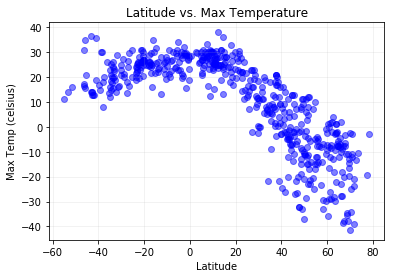

In [18]:
plt.scatter(cities_df["Lat"],cities_df["Max Temp"], color="b",  alpha=0.5)
plt.title("Latitude vs. Max Temperature")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temp (celsius)")
plt.grid(alpha=0.2)
plt.savefig("lat_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

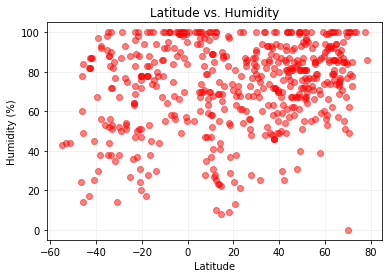

In [19]:
plt.scatter(cities_df["Lat"],cities_df["Humidity"], color="r", alpha=0.5)
plt.title("Latitude vs. Humidity")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")
plt.grid(alpha=0.2)
plt.savefig("hum_temp.png")
plt.show()

#### Latitude vs. Cloudiness Plot

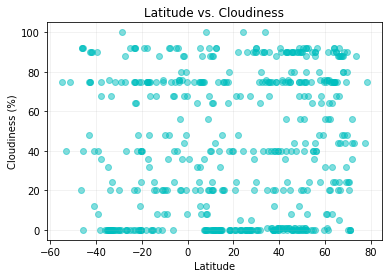

In [20]:
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"], color="c", alpha=0.5)
plt.title("Latitude vs. Cloudiness")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.grid(alpha=0.2)
plt.savefig("cloud_temp.png")
plt.show()

#### Latitude vs. Wind Speed Plot

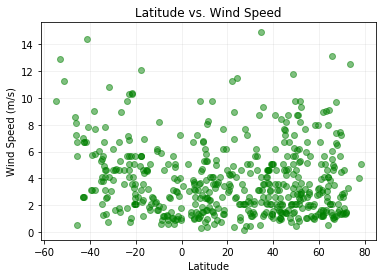

In [21]:
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"], color="g", alpha=0.5)
plt.title("Latitude vs. Wind Speed")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (m/s)")
plt.grid(alpha=0.2)
plt.savefig("wind_temp.png")
plt.show()

# written description of three observable trends based on the data.


In [ ]:
#1: Temperature are higher asd the distance from equator dicreases
#2: Latitude and humidity, as well as latitude and cloudiness, don't seem to be correlated, since the distribution of points are uniform accross x axis